<img src="images/GAlogo.png" style="float: left; margin: 15px; height: 100px">

# CAPSTONE PROJECT
## US TORNADOES AND HOW TO PREDICT THEIR MAGNITUDE

## Goal:
The main goal of my study is to try and predict the tornado's magnitude based on different features such as tornadoes' specific characteristics, damages costs, number of casualties, location, date, time, source, etc.

## Magnitude of tornadoes

- The Fujita scale and Enhanced Fujita scale are used to describe a tornado's power of destruction.
- Both are based on damaged caused, not wind speed, which is very difficult to compute.
- The Fujita scale was not considering the fact that different structures get damaged differently for a same wind speed.
- The Enhanced Fujita Scale is more complete and is the current reference. It has been in use since 2007, so if we want to study tornadoes before that year, we will not have any choise but to use the Fujita scale.
- For a first study, I am planning to use the tornadoes from 2007 until now. This notebook though shows the work on a 2015 subset.
- The table below describe the different degrees of destruction, and the wind speed estimates for both scales.

Comparison between original and Enhanced Fujita Scales:
<img src="http://study.com/cimages/multimages/16/efscale.png" alt="Drawing" style="width: 500px;"/>

Comparison between original and Enhanced Fujita Scales:
<img src="FvsEFscales.png" alt="Drawing" style="width: 500px;"/>

## Risks:
- As the magnitude of a tornado is mainly linked to the damages it caused, some earlier data (prior 2007) may not be relevant as they were not using the Enhanced Fujita scale.
- Moreover, judging the damages may sometimes be a difficult task, especially for remote tornadoes. Is the magnitude from those datasets a trustworthy variable in most cases? 

## Outline of this part 2 of the capstone project

- In this notebook, I am mainly going to present to you the data I imported.
- EDA will be performed
- Interesting (hopefully!) insights will be shared
- First modeling will be performed, to validate the project :)
- Ideas for the next steps will conclude

## 500 tornado events in the US, from Jan 1, 2015 to May 19, 2015

** For this first notebook, I am going to analyse a subset of the data, <br>available from https://www.ncdc.noaa.gov/stormevents/choosedates.jsp?statefips=-999%2CALL# **

<tr>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/US-NationalWeatherService-Logo.svg/160px-US-NationalWeatherService-Logo.svg.png" alt="Drawing" style="float: right; width: 100px;"/> </td>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/7/79/NOAA_logo.svg" alt="Drawing" style="float: right; width: 100px;"/> </td>
</tr>

<br>

## Data from the Storm Prediction Center (SPC) 
- part of the National Centers for Environmental Prediction (NCEP)
    - part of  the control of the National Weather Service (NWS)
        - part of the National Oceanic and Atmospheric Administration (NOAA) 
            - part of the United States Department of Commerce (DoC)


## Description of the features:

- **event_id<br>**  Ex: 383097, 374427, 364175
(Primary database key field)
(ID assigned by NWS to note a single, small part that goes into a specific storm episode; links the storm episode between the three files downloaded from SPC’s website)
<br>
- **state<br>**  Ex:  GEORGIA,  WYOMING, COLORADO
The state name where the event occurred (no State ID’s are included here; State Name is spelled out in ALL CAPS)
<br>
- **state_fips<br>**  Ex: 45, 30, 12
A unique number (State Federal Information Processing Standard) is assigned to the county by the National Institute for Standards and Technology (NIST).
<br>
- **year<br>**  Ex: 2000, 2006, 2012
Four digit year for the event in this record
<br>
- **month_name<br>**  Ex: January, February, March
Name of the month for the event in this record (spelled out; not abbreviated)
<br>
- **event_type<br>**  Ex: Hail, Thunderstorm Wind, Snow, Ice (spelled out; not abbreviated)
<br>
- **cz_type<br>**  Ex: C, Z , M
Indicates whether the event happened in a (C) county/parish, (Z) zone or (M) marine
<br>
- **cz_fips<br>** Ex: 245, 003, 155
The county FIPS number is a unique number assigned to the county by the National Institute for Standards and Technology (NIST) or NWS Forecast Zone Number (See addendum)
<br>
- **cz_name<br>**  Ex: AIKEN, RICHMOND, BAXTER (County/Parish, Zone or Marine Name assigned to the county FIPS number or NWS Forecast Zone)
<br>
- **wfo<br>**  Ex: CAE, BYZ, GJT (National Weather Service Forecast Office’s area of responsibility (County Warning Area) in which the event occurred)
<br>
- **begin_date_time<br>**  Ex: 4/1/2012  20:48
MM/DD/YYYY  24 hour time AM/PM
<br>
- **cz_timezone<br>**  Ex: EST-5, MST-7, CST-6
(Time Zone for the County/Parish, Zone or Marine Name)
Eastern Standard Time (EST), Central Standard Time (CST), Mountain Standard Time (MST), etc.
<br>
- **end_date_time<br>**  Ex: 4/1/2012  21:03
MM/DD/YYYY  24 hour time AM/PM
<br>
- **injuries_direct<br>**  Ex:  1, 0, 56
The number of injuries directly related to the weather event
<br>
- **injuries_indirect<br>**  Ex:  0, 15, 87
The number of injuries indirectly related to the weather event
<br>
- **deaths_direct<br>**  Ex: 0, 45, 23
The number of deaths directly related to the weather event.
<br>
- **deaths_indirect<br>** Ex: 0, 4, 6
The number of deaths indirectly related to the weather event
<br>
- **damage_property<br>**  Ex: 10.00K, 0.00K, 10.00M
The estimated amount of damage to property incurred by the weather event.  (e.g. 10.00K = $10,000; 10.00M = $10,000,000)
<br>
- **damage_crops<br>**  Ex: 0.00K, 500.00K, 15.00M
The estimated amount of damage to crops incurred by the weather event   (e.g. 10.00K = $10,000; 10.00M = $10,000,000)
source  Ex: Public, Newspaper, Law Enforcement, Broadcast Media, ASOS, Park and Forest Service, Trained Spotter, CoCoRaHS,  etc.  (can be any entry; isn’t restricted in what’s allowed)
Source reporting the weather event
<br>
- **tor_f_scale<br>**  Ex: EF0, EF1, EF2, EF3, EF4, EF5
Enhanced Fujita Scale describes the strength of the tornado based on the amount and type of damage caused by the tornado.  The F-scale of damage will vary in the destruction area; therefore, the highest value of the F-scale is recorded for each event. 
EF0 – Light Damage (40 – 72 mph)
EF1 – Moderate Damage (73 – 112 mph)
EF2 – Significant damage (113 – 157 mph)
EF3 – Severe Damage (158 – 206 mph)
EF4 – Devastating Damage (207 – 260 mph)
EF5 – Incredible Damage (261 – 318 mph)
<br>
- **tor_length<br>**  Ex: 0.66, 1.05, 0.48
Length of the tornado or tornado segment while on the ground (minimal of tenths of miles)
<br>
- **tor_width<br>**  Ex:  25, 50, 2640, 10
Width of the tornado or tornado segment while on the ground (in feet)
<br>
- **tor_other_wfo<br>**  Ex: DDC, ICT, TOP,OAX
Indicates the continuation of a tornado segment as it crossed from one National Weather Service Forecast Office to another.  The subsequent WFO identifier is provided within this field.
<br>
- **tor_other_cz_state<br>**   Ex: KS, NE, OK
The two character representation for the state name of the continuing tornado segment as it crossed from one county or zone to another.  The subsequent 2-Letter State ID is provided within this field.
<br>
- **tor_other_cz_fips<br>**  Ex: 41, 127, 153
The FIPS number of the county entered by the continuing tornado segment as it crossed from one county to another.  The subsequent FIPS number is provided within this field.
<br>
- **tor_other_cz_name<br>**  Ex: DICKINSON, NEMAHA, SARPY
The FIPS name of the county entered by the continuing tornado segment as it crossed from one county to another.  The subsequent county or zone name is provided within this field in ALL CAPS.
<br>
- **episode_title<br>**  Ex: Severe weather outbreak on Saturday April 14 in eastern Nebraska
A short description of the episode.  (Short name for the episode itself as determined by NWS.)
<br>
- **episode_narrative<br>**  (The episode narrative depicting the general nature and overall activity of the episode.  The narrative is created by NWS.)  Ex: A strong upper level system over the southern Rockies lifted northeast across the plains causing an intense surface low pressure system and attendant warm front to lift into Nebraska.  
<br>
- **event_narrative<br>**  (The event narrative provides more specific details of the individual event .  The event narrative is provided by NWS.) Ex:  Heavy rain caused flash flooding across parts of Wilber.  Rainfall of 2 to 3 inches fell across the area. 

# EDA

## Main packages import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

In [84]:
# To avoid display of warnings in Jupyter Notebook:
import warnings
warnings.filterwarnings('ignore')

## Exploring the data

In [4]:
# Import dataset extracted from website
raw_t1 = pd.read_csv('../../../../../../DATASETS/CAPSTONE/TORNADOS/storm_data_search_results_test2015_JanMay19.csv')
print raw_t1.shape
raw_t1.head(2)

(500, 35)


,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,ABSOLUTE_ROWNUMBER
0,549199,LAWRENCE CO.,TILTON,01/03/2015,1405,Tornado,,EF0,0,0,...,4,E,4,E,TILTON,31.43,-89.96,31.4300,-89.9600,1
1,549208,COVINGTON CO.,ARBO,01/03/2015,1436,Tornado,,EF1,0,0,...,5,SW,3,SSW,ARBO,31.68,-89.68,31.6972,-89.6553,2


In [5]:
# Columns
raw_t1.columns

Index([u'EVENT_ID', u'CZ_NAME_STR', u'BEGIN_LOCATION', u'BEGIN_DATE',
       u'BEGIN_TIME', u'EVENT_TYPE', u'MAGNITUDE', u'TOR_F_SCALE',
       u'DEATHS_DIRECT', u'INJURIES_DIRECT', u'DAMAGE_PROPERTY_NUM',
       u'DAMAGE_CROPS_NUM', u'STATE_ABBR', u'CZ_TIMEZONE', u'MAGNITUDE_TYPE',
       u'EPISODE_ID', u'CZ_TYPE', u'CZ_FIPS', u'WFO', u'INJURIES_INDIRECT',
       u'DEATHS_INDIRECT', u'SOURCE', u'FLOOD_CAUSE', u'TOR_LENGTH',
       u'TOR_WIDTH', u'BEGIN_RANGE', u'BEGIN_AZIMUTH', u'END_RANGE',
       u'END_AZIMUTH', u'END_LOCATION', u'BEGIN_LAT', u'BEGIN_LON', u'END_LAT',
       u'END_LON', u'ABSOLUTE_ROWNUMBER'],
      dtype='object')

In [85]:
# Look at the first 7 tornadoes:
raw_t1.head(7).T

,0,1,2,3,4,5,6
EVENT_ID,549199,549208,549220,549233,555830,549251,549253
CZ_NAME_STR,LAWRENCE CO.,COVINGTON CO.,COVINGTON CO.,JASPER CO.,NEWTON CO.,NEWTON CO.,LAUDERDALE CO.
BEGIN_LOCATION,TILTON,ARBO,ARBO,MOSS HILL,HICKORY,CHUNKY,POINT
BEGIN_DATE,01/03/2015,01/03/2015,01/03/2015,01/03/2015,01/03/2015,01/03/2015,01/03/2015
BEGIN_TIME,1405,1436,1439,1504,1516,1524,1526
EVENT_TYPE,Tornado,Tornado,Tornado,Tornado,Tornado,Tornado,Tornado
MAGNITUDE,,,,,,,
TOR_F_SCALE,EF0,EF1,EF1,EF2,EF1,EF1,EF1
DEATHS_DIRECT,0,0,0,0,0,0,0
INJURIES_DIRECT,0,0,0,0,0,0,0


In [86]:
# Checking for types and NaNs:
raw_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 36 columns):
EVENT_ID               500 non-null int64
CZ_NAME_STR            500 non-null object
BEGIN_LOCATION         500 non-null object
BEGIN_DATE             500 non-null object
BEGIN_TIME             500 non-null int64
EVENT_TYPE             500 non-null object
MAGNITUDE              500 non-null object
TOR_F_SCALE            500 non-null object
DEATHS_DIRECT          500 non-null int64
INJURIES_DIRECT        500 non-null int64
DAMAGE_PROPERTY_NUM    500 non-null int64
DAMAGE_CROPS_NUM       500 non-null int64
STATE_ABBR             500 non-null object
CZ_TIMEZONE            500 non-null object
MAGNITUDE_TYPE         500 non-null object
EPISODE_ID             500 non-null int64
CZ_TYPE                500 non-null object
CZ_FIPS                500 non-null int64
WFO                    500 non-null object
INJURIES_INDIRECT      500 non-null int64
DEATHS_INDIRECT        500 non-null int64
SO

All types seem to be correct and non Null values encountered

In [8]:
# Analysing the target distribution:
raw_t1.TOR_F_SCALE.value_counts()

EF0    312
EF1    153
EF2     26
EF3      8
EF4      1
Name: TOR_F_SCALE, dtype: int64

In that first semester of 2015, only one tornado was counted as magnitude EF4. Let's see where and when it occurred:

In [9]:
raw_t1[raw_t1['TOR_F_SCALE']=='EF4'].T

,99
EVENT_ID,574337
CZ_NAME_STR,OGLE CO.
BEGIN_LOCATION,CARTHAGE
BEGIN_DATE,04/09/2015
BEGIN_TIME,1743
EVENT_TYPE,Tornado
MAGNITUDE,
TOR_F_SCALE,EF4
DEATHS_DIRECT,0
INJURIES_DIRECT,0


It happened in Ilinois on April 9, 2015. It is know as the Rochelle-Fairdel EF-4 event.

The 2015 Rochelle-Fairdel tornado near peak intensity:
![The 2015 Rochelle-Fairdel tornado near peak intensity](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/PraderScott_Rochelle.jpg/270px-PraderScott_Rochelle.jpg)

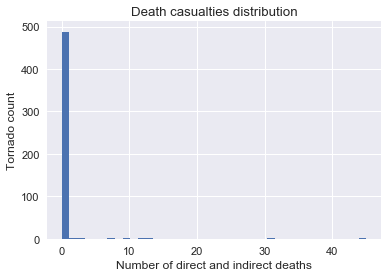

In [93]:
# Checking death casualties, taking both direct and indirect ones together:
pd.DataFrame(raw_t1.DEATHS_DIRECT+raw_t1.DEATHS_INDIRECT+raw_t1.INJURIES_DIRECT+raw_t1.INJURIES_INDIRECT).hist(bins=40, figsize=(6,4))
plt.title("Death casualties distribution")
plt.xlabel("Number of direct and indirect deaths")
plt.ylabel("Tornado count")
plt.show()

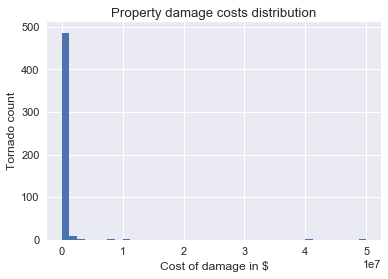

In [94]:
raw_t1.DAMAGE_PROPERTY_NUM.hist(bins=40, figsize=(6,4))
plt.title("Property damage costs distribution")
plt.xlabel("Cost of damage in $")
plt.ylabel("Tornado count")
plt.show()

From the two previous plots, we can can conclude that damaging tornadoes, in terms of casualties and of propoerties, is quite rare. This was quite obvious considering the distribution of the tornado magnitudes (most tornadoes are EF0 ones)

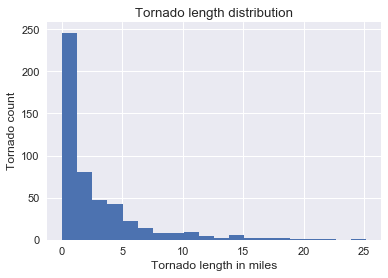

In [95]:
raw_t1.TOR_LENGTH.hist(bins=20, figsize=(6,4))
plt.title("Tornado length distribution")
plt.xlabel("Tornado length in miles")
plt.ylabel("Tornado count")
plt.show()

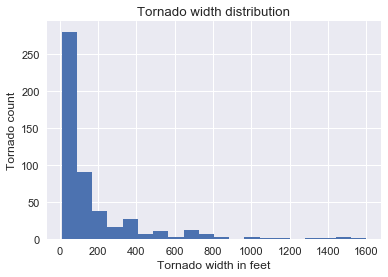

In [96]:
raw_t1.TOR_WIDTH.hist(bins=20, figsize=(6,4))
plt.title("Tornado width distribution")
plt.xlabel("Tornado width in feet")
plt.ylabel("Tornado count")
plt.show()

Most tornadoes do not have a long path and are not very wide.<br>
Big and powerful tornadoes are rare.

In [14]:
# Checking the mean tornado length according to the magnitude:
groupEFscale = raw_t1.groupby(by='TOR_F_SCALE')
groupEFscale.TOR_LENGTH.mean()

TOR_F_SCALE
EF0     1.573462
EF1     3.937320
EF2     9.869231
EF3     5.978750
EF4    20.940000
Name: TOR_LENGTH, dtype: float64

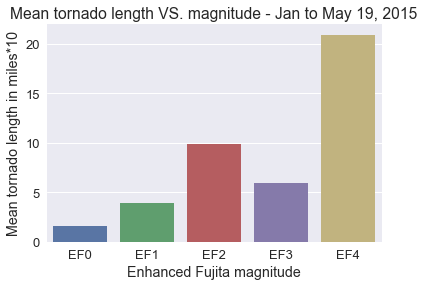

In [98]:
# Let's plot this:
plt.figure(figsize=(6,4))
sns.set(font_scale=1.3)
plt.title("Mean tornado length VS. magnitude - Jan to May 19, 2015")
sns.barplot(groupEFscale.groups.keys(), groupEFscale.TOR_LENGTH.mean())
plt.xlabel("Enhanced Fujita magnitude")
plt.ylabel("Mean tornado length in miles*10")
plt.show()

It seems like the more powerful the tornado, the longer the length of its straight path.

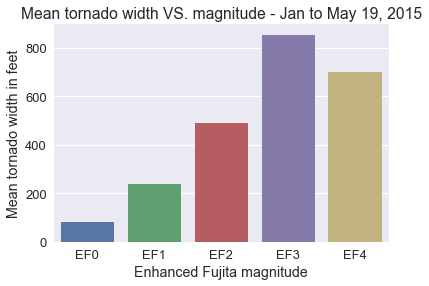

In [100]:
plt.figure(figsize=(6,4))
plt.title("Mean tornado width VS. magnitude - Jan to May 19, 2015")
sns.barplot(groupEFscale.groups.keys(), groupEFscale.TOR_WIDTH.mean())
plt.xlabel("Enhanced Fujita magnitude")
plt.ylabel("Mean tornado width in feet")
plt.show()

It seems like the wider the tornado is, the more powerful it is likely to be.
<br>However, as we saw before, in this subset of data few EF3 and EF4 tornadoes are present. The statistics are therefore not very conclusive. We will study this again when introducing more data.

In [20]:
# The begining and end azimuth represent the directions of the beginning and end points of the tornado,
# based on a weather station of reference 
raw_t1.BEGIN_AZIMUTH.nunique()

16

Let's convert these directions in angle from the North, clockwise.

In [101]:
def direction2degrees(azimuth):
    '''Returns an angle in degrees from North, clockwise, from an input direction'''
    # The package Windrose used to plot directions does not accept zeros, 
    # this is why I put 0.001 for North:
    if azimuth == 'N': return 0.001
    elif azimuth == 'NNE': return 22.5
    elif azimuth == 'NE': return 45.
    elif azimuth == 'ENE': return 67.5
    elif azimuth == 'E': return 90.
    elif azimuth == 'ESE': return 112.5
    elif azimuth == 'SE': return 135.
    elif azimuth == 'SSE': return 157.5
    elif azimuth == 'S': return 180.
    elif azimuth == 'SSW': return 202.5
    elif azimuth == 'SW': return 225.
    elif azimuth == 'WSW': return 247.5
    elif azimuth == 'W': return 270.
    elif azimuth == 'WNW': return 292.5
    elif azimuth == 'NW': return 315.
    else: return 337.5

#Creating new column:
raw_t1['AzDegrees'] = raw_t1.BEGIN_AZIMUTH.map(direction2degrees)

In [ ]:
from windrose import WindroseAxes, plot_windrose

In [102]:
# Windrose package plots a DF with columns speed and direction. Let's put the count of tornadoes for speed:
dfwindrose = pd.DataFrame({'speed':list(raw_t1.AzDegrees.value_counts().values),\
                          'direction':list(raw_t1.AzDegrees.value_counts().index)}).reset_index(drop=True)

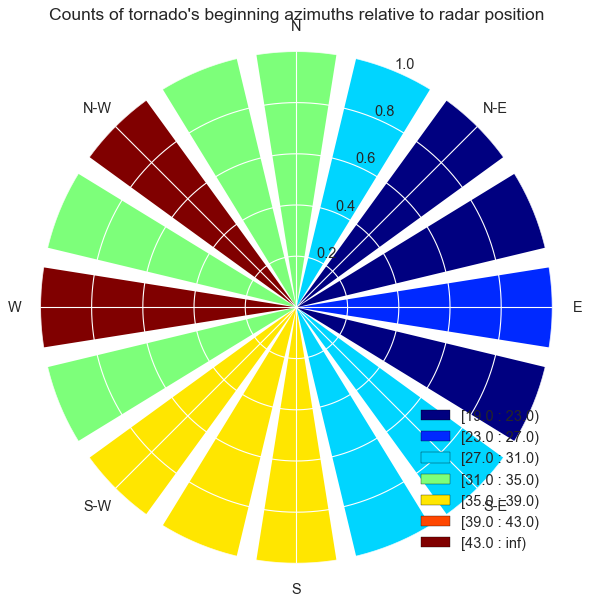

In [103]:
sns.set(font_scale=1.3)
plot_windrose(dfwindrose, kind='bar', bins=np.arange(19,46,4))
plt.title("Counts of tornado's beginning azimuths relative to radar position")
plt.legend('lower right')
plt.show()

- This graph means that a higher proportion of tornadoes is observed from the East of it when it appears.
- As we are going to see later, most tornadoes travel from West/South-West to East/NorthEast.
- Observing and measuring tornadoes from the East then makes more sense, as there is a higher probability that they are going to move towards the observation point.

In [112]:
# Analysing who reported the tornado
raw_t1.SOURCE.value_counts()

NWS Storm Survey          251
Storm Chaser               83
Trained Spotter            60
Emergency Manager          37
Amateur Radio              15
Public                     13
Broadcast Media            12
Law Enforcement            12
NWS Employee                8
Fire Department/Rescue      6
Local Official              1
Other Federal Agency        1
Newspaper                   1
Name: SOURCE, dtype: int64

The majority of tornado events were reported officially through NWS observation
<br>This is goog for us as it means the data should be more reliable. It reduces the risk.

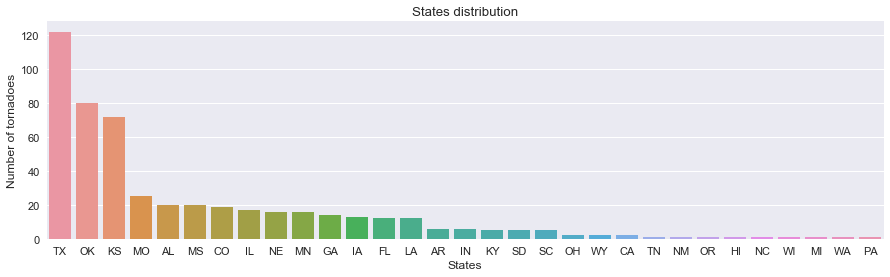

In [27]:
plt.figure(figsize=(15,4))
sns.barplot(raw_t1.STATE_ABBR.value_counts().index, raw_t1.STATE_ABBR.value_counts().values)
plt.title("States distribution")
plt.xlabel("States")
plt.ylabel("Number of tornadoes")
plt.show()

- As expected, most tornadoes happen in Texas, Oklahoma and Kansas.

We have analysed and visualized some of the features. <br>For our first modeling, we are going to drop some of them, which do not seem appropriate for predicting the magnitude.

## Creating feature matrix and target and further EDA

- Let's drop some unnecessary features for modeling like event ID, even type, absolute row number
- Let's also drop other features, which we may reintroduce later, but I want to keep it simple for our first models: longitude, latitude, county
- We also drop the magnitude, which is our target

In [106]:
X1_t1 = raw_t1.drop(['EVENT_ID','CZ_NAME_STR','BEGIN_LOCATION','EVENT_TYPE','MAGNITUDE',
                     'CZ_TIMEZONE','MAGNITUDE_TYPE','EPISODE_ID', 'CZ_TYPE', 'CZ_FIPS',
                     'WFO','FLOOD_CAUSE','BEGIN_RANGE', 'BEGIN_AZIMUTH', 'END_RANGE',
                     'END_AZIMUTH','END_LOCATION','BEGIN_LAT','BEGIN_LON','END_LAT',
                     'END_LON', 'ABSOLUTE_ROWNUMBER', 'AzDegrees'], axis=1)
X1_t1.head(2)

,BEGIN_DATE,BEGIN_TIME,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,INJURIES_INDIRECT,DEATHS_INDIRECT,SOURCE,TOR_LENGTH,TOR_WIDTH
0,01/03/2015,1405,EF0,0,0,1000,0,MS,0,0,NWS Storm Survey,0.08,50
1,01/03/2015,1436,EF1,0,0,20000,0,MS,0,0,NWS Storm Survey,1.88,50


In [31]:
from datetime import datetime, date
X1_t1.dtypes

BEGIN_DATE              object
BEGIN_TIME               int64
TOR_F_SCALE             object
DEATHS_DIRECT            int64
INJURIES_DIRECT          int64
DAMAGE_PROPERTY_NUM      int64
DAMAGE_CROPS_NUM         int64
STATE_ABBR              object
INJURIES_INDIRECT        int64
DEATHS_INDIRECT          int64
SOURCE                  object
TOR_LENGTH             float64
TOR_WIDTH                int64
dtype: object

We have to work on the date and time variables, for them to have the right type and format for modeling

In [32]:
def DateToOrdinal(stringdate):
    '''Converts a string date in format MM/DD/YYYY into a unique ordinal number'''
    return date.toordinal(datetime.strptime(stringdate, "%m/%d/%Y"))

In [107]:
X1_t1.BEGIN_DATE = X1_t1.BEGIN_DATE.map(DateToOrdinal)
X1_t1.head(2)

,BEGIN_DATE,BEGIN_TIME,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,INJURIES_INDIRECT,DEATHS_INDIRECT,SOURCE,TOR_LENGTH,TOR_WIDTH
0,735601,1405,EF0,0,0,1000,0,MS,0,0,NWS Storm Survey,0.08,50
1,735601,1436,EF1,0,0,20000,0,MS,0,0,NWS Storm Survey,1.88,50


In [104]:
def TimeToOrdinal(inttime):
    '''Converts integer time variable in format HHMM into a continuous float variable'''
    return round((100*(inttime/100)+(inttime%100)*100/60.), 2)

In [108]:
X1_t1.BEGIN_TIME = X1_t1.BEGIN_TIME.map(TimeToOrdinal)
X1_t1.head(2)

,BEGIN_DATE,BEGIN_TIME,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,INJURIES_INDIRECT,DEATHS_INDIRECT,SOURCE,TOR_LENGTH,TOR_WIDTH
0,735601,1408.33,EF0,0,0,1000,0,MS,0,0,NWS Storm Survey,0.08,50
1,735601,1460.00,EF1,0,0,20000,0,MS,0,0,NWS Storm Survey,1.88,50


In [109]:
# Gathering direct and indirect deaths, and injuries:
X1_t1['DEATHS'] = X1_t1.DEATHS_DIRECT + X1_t1.DEATHS_INDIRECT
X1_t1['INJURIES'] = X1_t1.INJURIES_DIRECT + X1_t1.INJURIES_INDIRECT
X1_t1.drop(['DEATHS_DIRECT','DEATHS_INDIRECT','INJURIES_DIRECT','INJURIES_INDIRECT'],
           axis=1, inplace=True)
X1_t1.head(2)

,BEGIN_DATE,BEGIN_TIME,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,SOURCE,TOR_LENGTH,TOR_WIDTH,DEATHS,INJURIES
0,735601,1408.33,EF0,1000,0,MS,NWS Storm Survey,0.08,50,0,0
1,735601,1460.00,EF1,20000,0,MS,NWS Storm Survey,1.88,50,0,0


### Target:

In [37]:
y1_t1 = X1_t1.TOR_F_SCALE
X1_t1.drop(['TOR_F_SCALE'], axis=1, inplace=True)

### Standardization:

In [113]:
# Standardizing numerical features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for feat in ['BEGIN_DATE','BEGIN_TIME','DAMAGE_PROPERTY_NUM','DAMAGE_CROPS_NUM',\
             'TOR_LENGTH','TOR_WIDTH','DEATHS','INJURIES']:
    X1_t1[feat] = scaler.fit_transform(X1_t1[feat])
X1_t1.head(2)

,BEGIN_DATE,BEGIN_TIME,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,SOURCE,TOR_LENGTH,TOR_WIDTH,DEATHS,INJURIES
0,-3.438122,-0.408723,EF0,-0.098415,-0.07615,MS,NWS Storm Survey,-0.721220,-0.486391,-0.096058,-0.109066
1,-3.438122,-0.300426,EF1,-0.091911,-0.07615,MS,NWS Storm Survey,-0.250416,-0.486391,-0.096058,-0.109066


### Correlations analysis of numerical features

In [114]:
# Creating a DF to examine the correlation between the numerical features:
numDF = X1_t1.drop(['STATE_ABBR','SOURCE'], axis=1)
# Let's reintroduce our target and transform it to integer:
numDF['MAGNITUDE'] = raw_t1['TOR_F_SCALE'].map(lambda x: 0 if x=='EF0' else 1 if x=='EF1' 
                                               else 2 if x=='EF2' else 3 if x=='EF3' 
                                               else 4 if x=='EF4' else 5)
numDF.head(2)

,BEGIN_DATE,BEGIN_TIME,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,TOR_LENGTH,TOR_WIDTH,DEATHS,INJURIES,MAGNITUDE
0,-3.438122,-0.408723,EF0,-0.098415,-0.07615,-0.721220,-0.486391,-0.096058,-0.109066,0
1,-3.438122,-0.300426,EF1,-0.091911,-0.07615,-0.250416,-0.486391,-0.096058,-0.109066,1


In [115]:
# Correlation matrix:
numDF.corr()

,BEGIN_DATE,BEGIN_TIME,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,TOR_LENGTH,TOR_WIDTH,DEATHS,INJURIES,MAGNITUDE
BEGIN_DATE,1.000000,0.125983,-0.016745,0.042289,0.048279,0.072788,0.012734,0.001844,-0.074535
BEGIN_TIME,0.125983,1.000000,0.039052,-0.011597,0.026226,0.138483,0.061154,0.032809,0.007615
DAMAGE_PROPERTY_NUM,-0.016745,0.039052,1.000000,-0.003063,0.188091,0.102004,0.406885,0.597311,0.267153
DAMAGE_CROPS_NUM,0.042289,-0.011597,-0.003063,1.000000,0.013707,0.208685,0.228343,0.022717,0.129348
TOR_LENGTH,0.048279,0.026226,0.188091,0.013707,1.000000,0.470607,0.096388,0.118300,0.518635
TOR_WIDTH,0.072788,0.138483,0.102004,0.208685,0.470607,1.000000,0.231008,0.205163,0.588722
DEATHS,0.012734,0.061154,0.406885,0.228343,0.096388,0.231008,1.000000,0.729725,0.301598
INJURIES,0.001844,0.032809,0.597311,0.022717,0.118300,0.205163,0.729725,1.000000,0.301924
MAGNITUDE,-0.074535,0.007615,0.267153,0.129348,0.518635,0.588722,0.301598,0.301924,1.000000


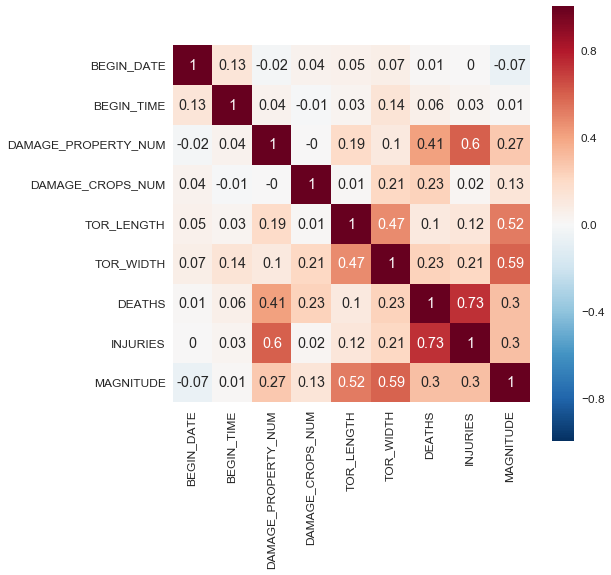

In [116]:
# Heatmap for easier interpretation:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)
sns.heatmap(numDF.corr().round(2), square=True, annot=True)
plt.show()

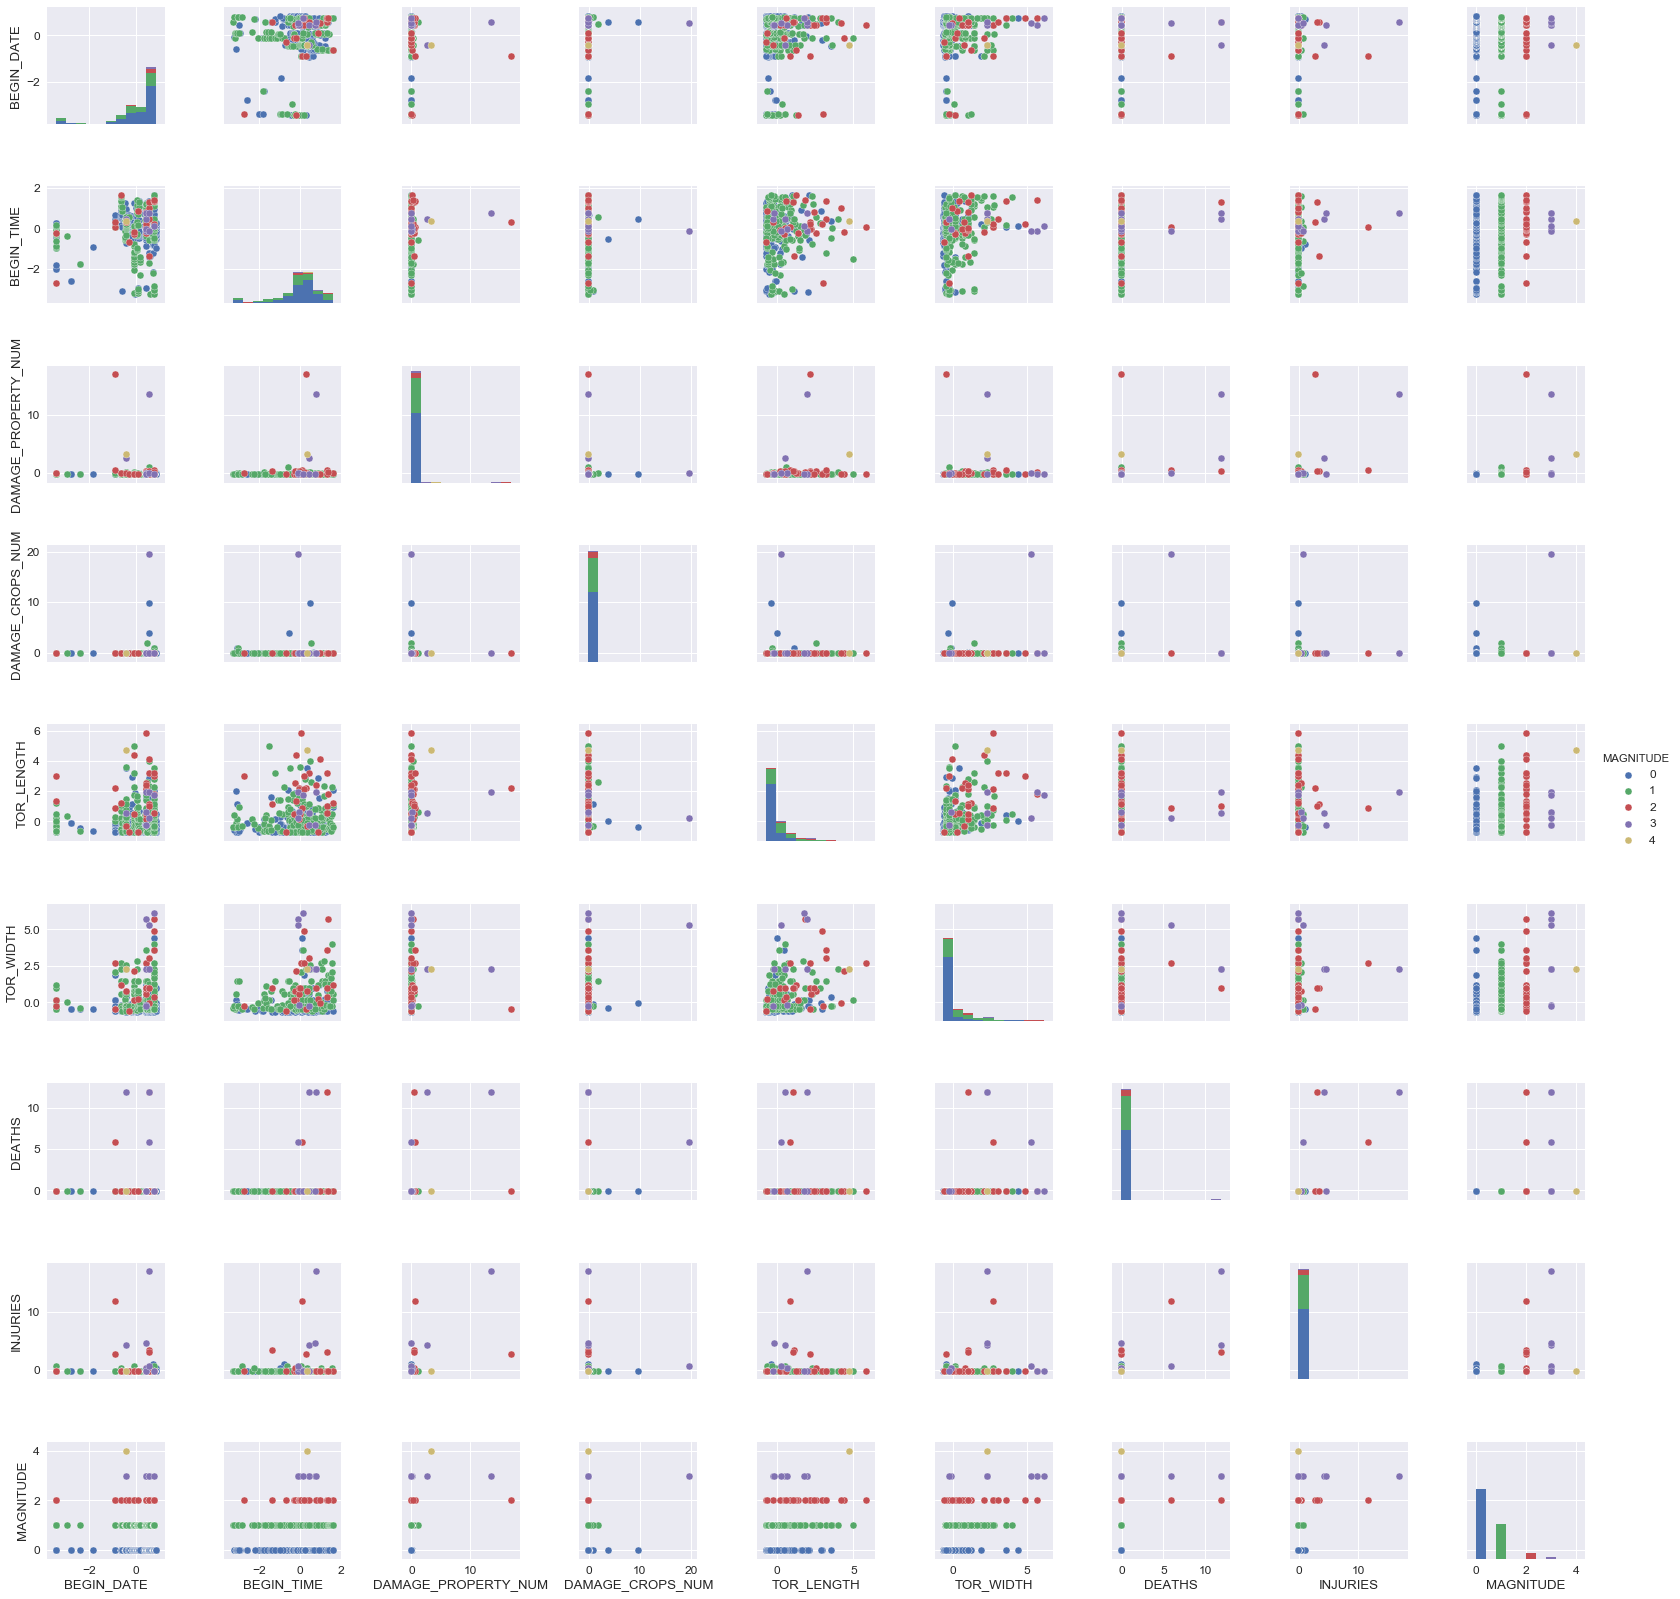

In [117]:
# Pairplots with different colors corresponding to magnitude:
sns.pairplot(numDF, hue='MAGNITUDE')
plt.show()

** Observation from the heatmap:**
- Clear strong positive correlation between number of deaths and injuries
- Strong positive correlation between number of injured persons and value of property damages
- Strong positive correlations between Magnitude, Tornado length and Tornado width
- It will be interesting to try Principal Component Analysis in order to reduce the number of correlated features

<br>
**Observation from the pairplot:**
- The pair plot does not really show much at this stage. We will analyse it further when introducing more data.
- Especially date and time of the Tornado need statistics over more months and years
- The correlation between Tornado width and Tornado length seem to appear
- The colored points tend to show that our target may benefit from regrouping the magnitudes. Having a binary target may help our analysis, at least to start with

### Dummyfying Source and State:

In [46]:
X1_t1.head(2)

,BEGIN_DATE,BEGIN_TIME,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,SOURCE,TOR_LENGTH,TOR_WIDTH,DEATHS,INJURIES
0,-3.438122,-0.408723,-0.098415,-0.07615,MS,NWS Storm Survey,-0.721220,-0.486391,-0.096058,-0.109066
1,-3.438122,-0.300426,-0.091911,-0.07615,MS,NWS Storm Survey,-0.250416,-0.486391,-0.096058,-0.109066


In [118]:
X1_t1_dums = pd.get_dummies(X1_t1, prefix=['STATE','SOURCE'], columns=['STATE_ABBR','SOURCE'])
X1_t1_dums.drop(['STATE_TX','SOURCE_NWS Storm Survey'], axis=1, inplace=True)
print X1_t1.shape, X1_t1_dums.shape
X1_t1_dums.head(2)

(500, 11) (500, 51)


,BEGIN_DATE,BEGIN_TIME,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,TOR_LENGTH,TOR_WIDTH,DEATHS,INJURIES,STATE_AL,...,SOURCE_Emergency Manager,SOURCE_Fire Department/Rescue,SOURCE_Law Enforcement,SOURCE_Local Official,SOURCE_NWS Employee,SOURCE_Newspaper,SOURCE_Other Federal Agency,SOURCE_Public,SOURCE_Storm Chaser,SOURCE_Trained Spotter
0,-3.438122,-0.408723,EF0,-0.098415,-0.07615,-0.721220,-0.486391,-0.096058,-0.109066,0,...,0,0,0,0,0,0,0,0,0,0
1,-3.438122,-0.300426,EF1,-0.091911,-0.07615,-0.250416,-0.486391,-0.096058,-0.109066,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

## Train/test split

In this subset of 500 tornadoes, only 1 was classified EF4 and none EF5. It means stratifying is not possible.<br>
For this subset, I am then going to gather EF4 with EF3 and call it EFsup3<br>

In [49]:
y1_t1_transf = y1_t1.map(lambda x: 'EFsup3' if x=='EF3' or x=='EF4' else x)
y1_t1_transf.value_counts()

EF0       312
EF1       153
EF2        26
EFsup3      9
Name: TOR_F_SCALE, dtype: int64

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X1_t1_dums, y1_t1_transf,
                                                stratify=y1_t1_transf,
                                                random_state=31)

## Baseline

In [51]:
ytest_valcounts = ytest.value_counts()

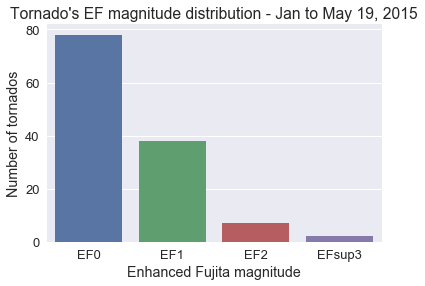

In [54]:
# Checking the new distribution after gathering EF3 and EF4 tornadoes:
plt.figure(figsize=(6,4))
sns.set(font_scale=1.3)
plt.title("Tornado's EF magnitude distribution - Jan to May 19, 2015")
sns.barplot(list(ytest_valcounts.keys()), list(ytest_valcounts.get_values()))
plt.xlabel("Enhanced Fujita magnitude")
plt.ylabel("Number of tornados")
plt.show()

The baseline accuracy is the probability to get an EF0 tornado

In [56]:
accuracy_baseline = ytest_valcounts.get_values()[0]/float(ytest_valcounts.get_values().sum())
print "Accuracy | Test\t\t | Baseline\t\t | EF0 tornados:\t", round(accuracy_baseline, 3)

Accuracy | Test		 | Baseline		 | EF0 tornados:	0.624


## Logisitic regression

### Default parameters:

#### Cross-validation on train set:

In [57]:
lr1 = LogisticRegression()

In [58]:
accuracy_cv5_lr1 = np.mean(cross_val_score(lr1, Xtrain, ytrain, cv=5))
print "Accuracy | Train CV5\t | Logistic Regresssion\t | Default params:\t", round(accuracy_cv5_lr1, 3)

Accuracy | Train CV5	 | Logistic Regresssion	 | Default params:	0.75


#### Fitting on train set and Scoring on test set:

In [59]:
lr1.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
yhat_lr1 = lr1.predict(Xtest)
accuracy_lr1 = accuracy_score(ytest, yhat_lr1)
print "Accuracy | Test\t\t | Logistic Regresssion\t | Default params:\t", round(accuracy_lr1, 3)

Accuracy | Test		 | Logistic Regresssion	 | Default params:	0.712


### Parameter optimization:

In [61]:
params_logreg_v1 = {'penalty': ['l1','l2'], 'C':np.logspace(-1,1,51)}
lr2 = GridSearchCV(lr1, param_grid=params_logreg_v1, cv=5)

In [62]:
lr2.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  0.1    ,   0.10965,   0.12023,   0.13183,   0.14454,   0.15849,
         0.17378,   0.19055,   0.20893,   0.22909,   0.25119,   0.27542,
         0.302  ,   0.33113,   0.36308,   0.39811,   0.43652,   0.47863,
         0.52481,   0.57544,   0.63096,...3 ,   5.24807,   5.7544 ,   6.30957,   6.91831,   7.58578,
         8.31764,   9.12011,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
lr2.best_params_

{'C': 1.7378008287493754, 'penalty': 'l1'}

In [64]:
params_logreg_v2 = {'penalty': ['l1','l2'], 'C':np.linspace(0.5,2.5,41)}
lr2 = GridSearchCV(lr1, param_grid=params_logreg_v2, cv=5)
lr2.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,
        1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,
        1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,  2.25,
        2.3 ,  2.35,  2.4 ,  2.45,  2.5 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [65]:
print "Best logistic regression parameters for liblinear solver:\n", lr2.best_params_

Best logistic regression parameters for liblinear solver:
{'penalty': 'l1', 'C': 1.4500000000000002}


In [66]:
print "Accuracy | Train CV5\t | Logistic Regresssion\t | Optimal params:\t", round(lr2.best_score_, 3)

Accuracy | Train CV5	 | Logistic Regresssion	 | Optimal params:	0.763


### Best logistic model

In [67]:
lr3 = lr2.best_estimator_.fit(Xtrain, ytrain)
yhat_lr3 = lr3.predict(Xtest)
accuracy_lr3 = accuracy_score(ytest, yhat_lr3)
print "Accuracy | Test\t\t | Logistic Regresssion\t | Default params:\t", round(accuracy_lr1, 3)
print "Accuracy | Test\t\t | Logistic Regresssion\t | Optimal params:\t", round(accuracy_lr3, 3)

Accuracy | Test		 | Logistic Regresssion	 | Default params:	0.712
Accuracy | Test		 | Logistic Regresssion	 | Optimal params:	0.688


**Let's regridsearch again, using only Ridge penalty, so that we can try other solvers**

In [68]:
params_logreg_v3 = {'penalty': ['l2'], 'C':np.logspace(-1,1,51), 
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
lr4 = GridSearchCV(lr1, param_grid=params_logreg_v3, cv=5)

In [69]:
lr4.fit(Xtrain, ytrain)
lr4.best_params_

{'C': 1.9054607179632472, 'penalty': 'l2', 'solver': 'newton-cg'}

In [70]:
params_logreg_v4 = {'penalty': ['l2'], 'C':np.linspace(1,3,41), 
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
lr5 = GridSearchCV(lr1, param_grid=params_logreg_v4, cv=5)
lr5.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': array([ 1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
        1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,
        1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,  2.25,  2.3 ,
        2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,  2.7 ,  2.75,
        2.8 ,  2.85,  2.9 ,  2.95,  3.  ]), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [71]:
lr5.best_params_

{'C': 1.05, 'penalty': 'l2', 'solver': 'newton-cg'}

In [72]:
lr5.best_score_

0.75466666666666671

In [73]:
accuracy_score(ytest, lr5.best_estimator_.fit(Xtrain, ytrain).predict(Xtest))

0.70399999999999996

In [74]:
lr6 = lr5.best_estimator_.fit(Xtrain, ytrain)
yhat_lr6 = lr6.predict(Xtest)
accuracy_lr6 = accuracy_score(ytest, yhat_lr6)
print "Accuracy | Test\t\t | Logistic Regresssion\t | Default params:\t", round(accuracy_lr1, 3)
print "Accuracy | Test\t\t | Logistic Regresssion\t | Optimal params:\t", round(accuracy_lr6, 3)

Accuracy | Test		 | Logistic Regresssion	 | Default params:	0.712
Accuracy | Test		 | Logistic Regresssion	 | Optimal params:	0.704


- **Well, default is still better.**
- **The reason for this is probably due to the fact that for all our GridSearch results, C gets higher than the default, which means regularization is weaker, which means overfitting is more likely, which means performance on train set is better, but the test set performs worse**
- **For the best logistic regression model, I am therefore going to choose the default hyperparameters**

### Confusion matrix for best logistic regression model:

In [75]:
lr1.classes_

array(['EF0', 'EF1', 'EF2', 'EFsup3'], dtype=object)

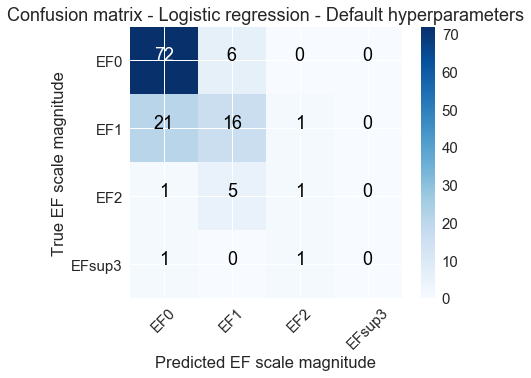

In [119]:
# Function to plot the confusion matrices in a nicer and more interpretable way:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues, 
                          xlab='Predicted label',ylab='True label'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.show()

# Computing the confusion matrix
confmatrix_lr1 = confusion_matrix(ytest, yhat_lr1)

# Plotting it using the function:
sns.set(font_scale=1.5)
plt.figure(figsize=(7,5))
plot_confusion_matrix(confmatrix_lr1, lr1.classes_,\
                      'Confusion matrix - Logistic regression - Default hyperparameters',\
                      xlab='Predicted EF scale magnitude', ylab='True EF scale magnitude')
plt.show()

** Observations on confusion matrix:**

- It is somehow more striking that the number of statistics for strong tornardos is not enough.
- For this subset of 500 tornardos, we should make the target binary for strong and weak tornardo (according to the Storm Prediction Center, a significant tornado could be defined as EF2 and higher)
- If we want to better categorize the tornadoes, even the most powerfull ones which are rare, we will need to incorporate much more data over a long period of time.

- Most EF0 tornados are correctly predicted. The few ones which are not were predicted as EF1.
- Lots of stronger tornados are predicted as EF0 too. The model tend to approximate the baseline. We will need to improve our modeling by different means:
    * Incorporating more tornadoes to have better statistics
    * Incorporating new features from the same original table and/or other datasets:
        - Average income per county: EF scale is linked to damage caused by a tornado, rather than the actual strength of its winds. Damage is linked to the quality of the properties. It would therefore be interesting to find US census data about that quality, like maybe the average income per county
        - Duration of the tornado
        - Azimuth of the tornado, which can be computed by beginning and end longitude and latitude data.
    * Reducing the number of features by doing a principal component analysis: as we saw before, some features are correlated like the length and width, it may be useful to find the direction of high variance and reduce the number of features

### Coefficients from best logistic model:

In [77]:
# Creating a DF out of the coefficients, and sorting them in order of importance of their absolute value:
coefDF_lr1 = pd.DataFrame({'Coefficients EF0': [lr1.intercept_[0]]+list(lr1.coef_[0]),\
                           'Coefficients EF1': [lr1.intercept_[1]]+list(lr1.coef_[1]),\
                           'Coefficients EF2': [lr1.intercept_[2]]+list(lr1.coef_[2]),\
                           'Coefficients EFsup3': [lr1.intercept_[3]]+list(lr1.coef_[3])},
                          index = [['Intercept']+[str(i) for i in Xtrain.columns]])

coefDF_lr1['AbsoluteValue EF0'] = coefDF_lr1['Coefficients EF0'].map(lambda x: np.abs(x))
coefDF_lr1['AbsoluteValue EF1'] = coefDF_lr1['Coefficients EF1'].map(lambda x: np.abs(x))
coefDF_lr1['AbsoluteValue EF2'] = coefDF_lr1['Coefficients EF2'].map(lambda x: np.abs(x))
coefDF_lr1['AbsoluteValue EFsup3'] = coefDF_lr1['Coefficients EFsup3'].map(lambda x: np.abs(x))

coefDF_lr1.head(10)

,Coefficients EF0,Coefficients EF1,Coefficients EF2,Coefficients EFsup3,AbsoluteValue EF0,AbsoluteValue EF1,AbsoluteValue EF2,AbsoluteValue EFsup3
Intercept,0.022651,-0.511555,-3.387542,-3.945297,0.022651,0.511555,3.387542,3.945297
BEGIN_DATE,-0.069481,0.115642,-0.263843,0.199503,0.069481,0.115642,0.263843,0.199503
BEGIN_TIME,0.060213,-0.013684,0.252370,-0.011028,0.060213,0.013684,0.252370,0.011028
DAMAGE_PROPERTY_NUM,-0.794943,-0.860178,0.093347,0.167131,0.794943,0.860178,0.093347,0.167131
DAMAGE_CROPS_NUM,0.227781,-0.205592,-0.278545,0.231074,0.227781,0.205592,0.278545,0.231074
TOR_LENGTH,-0.908060,0.293267,0.739687,0.042861,0.908060,0.293267,0.739687,0.042861
TOR_WIDTH,-1.242473,0.263632,0.390669,0.723239,1.242473,0.263632,0.390669,0.723239
DEATHS,-0.195484,-0.254638,0.256926,-0.365976,0.195484,0.254638,0.256926,0.365976
INJURIES,-0.251501,-0.335072,-0.134317,0.374276,0.251501,0.335072,0.134317,0.374276
STATE_AL,-0.260092,0.291365,-0.608550,-0.171266,0.260092,0.291365,0.608550,0.171266


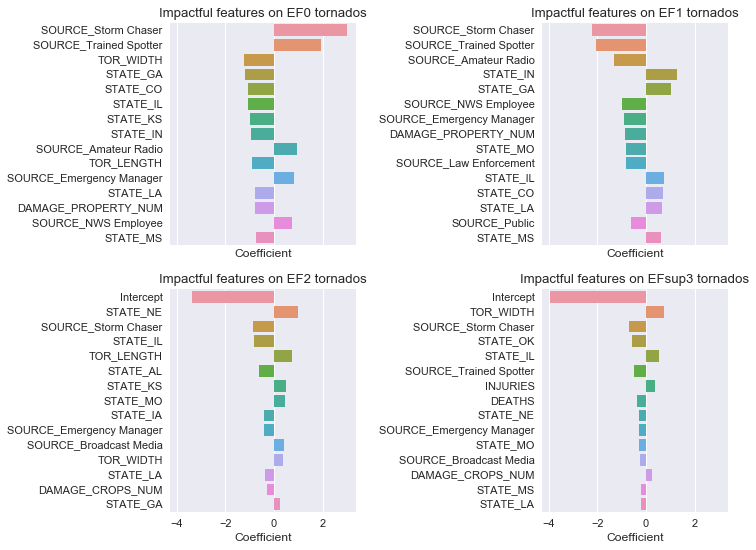

In [78]:
# Plotting the coefficients in decreasing order of importance for each magnitude:

# Variable used for the labels of each graph
magtxt = [['0', '1'], ['2', 'sup3']]

# Initialization of the 4 plots:
sns.set(font_scale=1.1)
fig, ax = plt.subplots(2,2, figsize=(10,9), sharex=True)
fig.subplots_adjust(wspace = 1)

# Looping over the 4 different tornado magnitudes:
for i in range(2):
    for j in range(2):
        # Saving the first 15 rows of sorted dataframes, without the coefficients=0:
        coefDFsort_lr1 = coefDF_lr1[coefDF_lr1['Coefficients EF{}'.format(magtxt[i][j])]!=0]\
                                    .sort_values(by='AbsoluteValue EF{}'.format(magtxt[i][j]),\
                                                 ascending=False).head(15)

        # Horizontal bar plot
        sns.barplot(coefDFsort_lr1['Coefficients EF{}'.format(magtxt[i][j])],\
                    list(coefDFsort_lr1.index),\
                    orient='h', ax=ax[i][j])

        # Labels:
        ax[i][j].set_title("Impactful features on EF{} tornados".format(magtxt[i][j]))
        ax[i][j].set_xlabel("Coefficient")

In [79]:
# For a reminder:
y1_t1_transf.value_counts()

EF0       312
EF1       153
EF2        26
EFsup3      9
Name: TOR_F_SCALE, dtype: int64

- At this stage, because there are so few tornadoes about EF3 magnitude, the computed importance of the coefficients given by Lasso is not completly reliable.
- Same for EF2 tornados: only 26 out of 500 (5%)
- It will be interesting to do the same exercise with more data for a longer period of time
<br>
<br>
- For EF0 and EF1 tornadoes, the results are probably more reliable. Some interesting facts:
    - Storm chasers and trained spotters are the most inflential features: positively for EF0 and negatively for EF1. It means weak tornadoes are more likely to be reported by them than by officials (do radars detect well weak tornadoes?). The negative correlation for EF1 is due to the fact that they most likely classify wrongly the EF1 as EF0, as we saw from the interpretation of the confusion matrix.
    - The tornado width as a third (negatively) influential feature to predict EF0 tornadoes confirms our assumption that weak tornadoes are likely to be thinner.
<br>
<br>
- Let's now try Random Forest to check if we can improve the accuracy of the model

## Random Forest

### Default parameters:

#### Cross-validation on train set:

In [80]:
rf1 = RandomForestClassifier(random_state=31)

In [81]:
accuracy_cv5_rf1 = np.mean(cross_val_score(rf1, Xtrain, ytrain, cv=5))
print "Accuracy | Train CV5\t | Random Forest\t | Default params:\t", round(accuracy_cv5_rf1, 3)

Accuracy | Train CV5	 | Random Forest	 | Default params:	0.771


#### Fitting on train set and Scoring on test set:

In [82]:
rf1.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=31,
            verbose=0, warm_start=False)

In [83]:
yhat_rf1 = rf1.predict(Xtest)
accuracy_rf1 = accuracy_score(ytest, yhat_rf1)
print "Accuracy | Test\t\t | Random Forest\t | Default params:\t", round(accuracy_rf1, 3)

Accuracy | Test		 | Random Forest	 | Default params:	0.744


### Parameter optimization:

In [131]:
params_randfor_v1 = {'criterion': ['gini','entropy'],
                     'max_depth': [2,4,6,8,10,15,20],
                     'max_features': [0.5,0.6,0.7,0.8,0.9],
                     'n_estimators': [10,20,30,40,50,60]
                    }

rf2 = GridSearchCV(rf1, param_grid=params_randfor_v1, cv=5, verbose=1, n_jobs=2)

In [132]:
rf2.fit(Xtrain, ytrain)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:   13.5s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   53.8s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 1588 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 2100 out of 2100 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=31,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'max_features': [0.5, 0.6, 0.7, 0.8, 0.9], 'n_estimators': [10, 20, 30, 40, 50, 60], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [133]:
rf2.best_score_

0.79466666666666663

In [134]:
rf2.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'n_estimators': 20}

In [136]:
print "Accuracy | Train CV5\t | Random Forest\t | Opimized params:\t", round(rf2.best_score_, 3)

Accuracy | Train CV5	 | Random Forest	 | Opimized params:	0.795


More parameters:

In [137]:
params_randfor_v2 = {'criterion': ['gini','entropy'],
                     'max_depth': [6,8,10,12],
                     'max_features': [0.7,0.8,0.9],
                     'n_estimators': [10,20,30,40],
                     'min_samples_split': [2,5,8,11],
                     'min_samples_leaf': [1,3,5]
                    }

rf3 = GridSearchCV(rf1, param_grid=params_randfor_v2, cv=5, verbose=1, n_jobs=2)

rf3.fit(Xtrain, ytrain)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    9.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   41.6s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 1588 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 2488 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Done 3588 tasks      | elapsed:  6.5min
[Parallel(n_jobs=2)]: Done 4888 tasks      | elapsed:  8.7min
[Parallel(n_jobs=2)]: Done 5760 out of 5760 | elapsed: 10.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=31,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'min_samples_leaf': [1, 3, 5], 'n_estimators': [10, 20, 30, 40], 'min_samples_split': [2, 5, 8, 11], 'criterion': ['gini', 'entropy'], 'max_features': [0.7, 0.8, 0.9], 'max_depth': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [138]:
rf3.best_score_

0.79466666666666663

In [139]:
rf3.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 20}

In [82]:
params_randfor_v3 = {'criterion': ['gini','entropy'],
                     'max_depth': [5,6,7,8,9],
                     'max_features': [0.6,0.7,0.8,0.9],
                     'n_estimators': [18,19,20,21,22,24],
                     'min_samples_split': [4,5,6,7,8,9],
                     'min_samples_leaf': [1,2]
                    }

rf4 = GridSearchCV(rf1, param_grid=params_randfor_v3, cv=5, verbose=1, n_jobs=2)

rf4.fit(Xtrain, ytrain)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   15.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   36.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:  4.5min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:  5.7min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:  7.0min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:  8.5min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 10.5min
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed: 12.5min
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed: 14.6min
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed: 16.7min
[Parallel(n_jobs=2)]: Done 12796 tasks      | elapsed: 19.1min
[Parallel(

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=31,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'min_samples_leaf': [1, 2], 'n_estimators': [18, 19, 20, 21, 22, 24], 'min_samples_split': [4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy'], 'max_features': [0.6, 0.7, 0.8, 0.9], 'max_depth': [5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [83]:
rf4.best_score_

0.80000000000000004

OK, got over 80% accuracy, now I'm happy :)

In [84]:
rf4.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 24}

Seems like we reached the best score so far, let's use it into a new model:

### Best Random Forest model

In [86]:
rf5 = rf4.best_estimator_
rf5.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=0.7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=24, n_jobs=1, oob_score=False, random_state=31,
            verbose=0, warm_start=False)

In [98]:
print "Accuracy | Train+Test\t | Baseline\t\t | EF0 tornados:\t", round(312/500., 3)
print "Accuracy | Train CV5\t | Logistic Regresssion\t | Default params:\t", round(accuracy_cv5_lr1, 3)
print "Accuracy | Train CV5\t | Logistic Regresssion\t | Optimal params:\t", round(lr2.best_score_, 3)
print "Accuracy | Train CV5\t | Random Forest\t | Default params:\t", round(accuracy_cv5_rf1, 3)
print "Accuracy | Train CV5\t | Random Forest\t | Optimal params:\t", round(rf4.best_score_, 3)

Accuracy | Train+Test	 | Baseline		 | EF0 tornados:	0.624
Accuracy | Train CV5	 | Logistic Regresssion	 | Default params:	0.75
Accuracy | Train CV5	 | Logistic Regresssion	 | Optimal params:	0.763
Accuracy | Train CV5	 | Random Forest	 | Default params:	0.771
Accuracy | Train CV5	 | Random Forest	 | Optimal params:	0.8


In [99]:
yhat_rf5 = rf5.predict(Xtest)
accuracy_rf5 = accuracy_score(ytest, yhat_rf5)
print "Accuracy | Test\t\t | Baseline\t\t | EF0 tornados:\t", round(accuracy_baseline, 3)
print "Accuracy | Test\t\t | Logistic Regresssion\t | Default params:\t", round(accuracy_lr1, 3)
print "Accuracy | Test\t\t | Logistic Regresssion\t | Optimal params:\t", round(accuracy_lr3, 3)
print "Accuracy | Test\t\t | Random Forest\t | Default params:\t", round(accuracy_rf1, 3)
print "Accuracy | Test\t\t | Random Forest\t | Optimized params:\t", round(accuracy_rf5, 3)

Accuracy | Test		 | Baseline		 | EF0 tornados:	0.624
Accuracy | Test		 | Logistic Regresssion	 | Default params:	0.712
Accuracy | Test		 | Logistic Regresssion	 | Optimal params:	0.688
Accuracy | Test		 | Random Forest	 | Default params:	0.744
Accuracy | Test		 | Random Forest	 | Optimized params:	0.768


** Summary tables of the model scores so far:**

| Type | Train or Test | Model | Parameters | Score |
| :---: | :---: | :---: | :---: | :--- |
| Accuracy | Train+Test | Baseline | EF0 tornados | 0.624 |
| Accuracy | Train CV5 | Logistic Regresssion | Default params | 0.75 |
| Accuracy | Train CV5 | Logistic Regresssion | Optimal params | 0.763 |
| Accuracy | Train CV5	| Random Forest | Default params | 0.771 |
| Accuracy | Train CV5 | Random Forest | Optimized params | 0.8 |

| Type | Train or Test | Model | Parameters | Score |
| :---: | :---: | :---: | :---: | :--- |
| Accuracy | Test | Baseline | EF0 tornados | 0.624 |
| Accuracy | Test | Logistic Regresssion | Default params | 0.712 |
| Accuracy | Test | Logistic Regresssion | Optimal params | 0.688 |
| Accuracy | Test	| Random Forest | Default params | 0.744 |
| Accuracy | Test | Random Forest | Optimized params | 0.768 |

- As expected, random forest gets the best accuracy
- We managed to improve the baseline by 20%
- Let's now try and improve it more, by re-introducing some of the features we previously dropped, and which could provide meaningful information

# Adding more features: 

- Heading of the tornado
- New computation of the tornado length
- Average longitude along the tornado's path
- Average latitude along the tornado's path

## Direction and length of the tornado based on lat and long of beginning and end points:

- $R$ is the Earth radius
<br>
- Let's call $A (long_{A}, lat_{A})$ the beginning point of a tornado and $B (long_{B}, lat_{B})$ the end point
- Let's call $\alpha$ the azimuth of the straight line going from A to B. This is the angle in degrees between North and $\overrightarrow{AB}$, clockwise
- From trigonometry, we get:
    * The distance from A to B:
$$ AB = R\sqrt{(long_{B}-long_{A})^2+(lat_{B}-lat_{A})^2} $$
    * The azimuth:
$$ \alpha = \arctan\left(\frac{long_{B}-long_{A}}{lat_{B}-lat_{A}}\right) $$

<br>
- In our dataframe, we already have the tornado length, so we can compare with our computation. Let's remind ourselves that the lat, long and length were computed originally from azimuths and range from a geographical center.

## Function adding the 4 new features

In [120]:
# Computing statistics of the average latitude of the tornado paths:
((raw_t1.BEGIN_LAT+raw_t1.END_LAT)/2).describe()

count    500.000000
mean      35.918659
std        4.127491
min       21.325700
25%       32.613088
50%       35.478000
75%       38.987962
max       47.330000
dtype: float64

From https://rechneronline.de/earth-radius/, we get the Earth radius for any given latitude and altitude.
Let's compute it from the mean latitude $36^o$ and with assumption at mean sea surface. We get $R = 6370.789km = 3958.625 miles$

In [122]:
def computeLength(df, xA='BEGIN_LON', yA='BEGIN_LAT', xB='END_LON', yB='END_LAT'):
    '''Takes a tornado dataframe in input, with geographical coordinates of beginning and
    end points.
    Returns the dataframe with 4 new features: 
    direction the tornado headed from North (azimuth)
    length of its rectiligne path
    average latitude
    average longitude'''
    
    # Approximate Earth radius in miles:
    R = 3959
    
    # Coordinates differences converted to radians:
    diffLON = np.radians(df[xB] - df[xA])
    diffLAT = np.radians(df[yB] - df[yA])
    
    # Length and azimuth:
    L = R * np.sqrt(diffLON**2 + diffLAT**2)
    AZ = np.degrees(np.arctan(diffLON/diffLAT))
    LAT = (df[yA]+df[yB])/2
    LON = (df[xA]+df[xB])/2
    df['ComputedLength'] = np.round(L,2)
    
    # To keep only positive azimuths:
    df['ComputedAzimuth'] = np.round(AZ,2).map(lambda x: 360+x if x<0 else x)
    
    df['AverageLatitude'] = np.round(LAT,4)
    df['AverageLongitude'] = np.round(LON,4)
    return df

In [123]:
# Let's have a look at the example of the strongest tornado:
X2_t1 = computeLength(raw_t1)
X2_t1[X2_t1['TOR_F_SCALE']=='EF4'][['BEGIN_LOCATION', 'END_LOCATION', 'TOR_F_SCALE','TOR_LENGTH',
                                    'BEGIN_LAT', 'END_LAT', 'BEGIN_LON', 'END_LON', 
                                    'ComputedLength', 'ComputedAzimuth', 'AverageLatitude',
                                    'AverageLongitude']]

,BEGIN_LOCATION,END_LOCATION,TOR_F_SCALE,TOR_LENGTH,BEGIN_LAT,END_LAT,BEGIN_LON,END_LON,ComputedLength,ComputedAzimuth,AverageLatitude,AverageLongitude
99,CARTHAGE,MONROE CENTER,EF4,20.94,41.8886,42.0947,-89.2381,-88.9392,25.09,55.41,41.9916,-89.0886


Our computed length is about 20% higher than the given one in the table

In [99]:
# Let's take the example of EF3 tornados:
X2_t1[X2_t1['TOR_F_SCALE']=='EF3'][['BEGIN_LOCATION', 'END_LOCATION', 'TOR_F_SCALE', 'TOR_LENGTH',
                                    'ComputedLength', 'ComputedAzimuth', 'BEGIN_LAT', 'END_LAT',
                                    'BEGIN_LON', 'END_LON', 'BEGIN_RANGE', 'END_RANGE',
                                    'BEGIN_AZIMUTH', 'END_AZIMUTH', 
                                    'AverageLatitude', 'AverageLongitude']]

,BEGIN_LOCATION,END_LOCATION,TOR_F_SCALE,TOR_LENGTH,ComputedLength,ComputedAzimuth,BEGIN_LAT,END_LAT,BEGIN_LON,END_LON,BEGIN_RANGE,END_RANGE,BEGIN_AZIMUTH,END_AZIMUTH,AverageLatitude,AverageLongitude
102,FAIRDALE,FAIRDALE,EF3,4.83,5.41,41.94,42.0947,42.1529,-88.9392,-88.8869,1,4,SW,NNE,42.1238,-88.9130
256,AMBER,BRIDGE CREEK,EF3,10.30,10.44,43.93,35.1576,35.2664,-97.8032,-97.6984,4,3,E,NNE,35.2120,-97.7508
261,MT HOPE,MT HOPE,EF3,5.22,5.37,23.01,37.8404,37.9120,-97.6507,-97.6203,2,4,SSE,NE,37.8762,-97.6355
283,NEW TABOR,NEW TABOR,EF3,1.87,2.14,49.46,39.8584,39.8785,-97.5478,-97.5243,4,3,SSW,S,39.8684,-97.5360
291,VALLEY BROOK,VALLEY BROOK,EF3,2.00,1.86,303.34,35.4061,35.4209,-97.4769,-97.4994,0,2,NNE,NW,35.4135,-97.4881
328,NIMROD,CISCO,EF3,3.79,4.47,84.15,32.3032,32.3098,-99.0133,-98.9489,3,5,NE,SSE,32.3065,-98.9811
376,PRIMROSE,VAN,EF3,10.22,10.23,354.61,32.4095,32.5569,-95.6190,-95.6329,2,3,SW,NNE,32.4832,-95.6260
420,ELMER,HUMPHREYS,EF3,9.60,10.93,64.07,34.4363,34.5055,-99.3502,-99.2079,3,4,S,SSE,34.4709,-99.2790


The computed length is slightly higher in most cases.<br>
Let's do a scatter plot between the original and newly computed length:

## Analysis computed vs original tornado length:

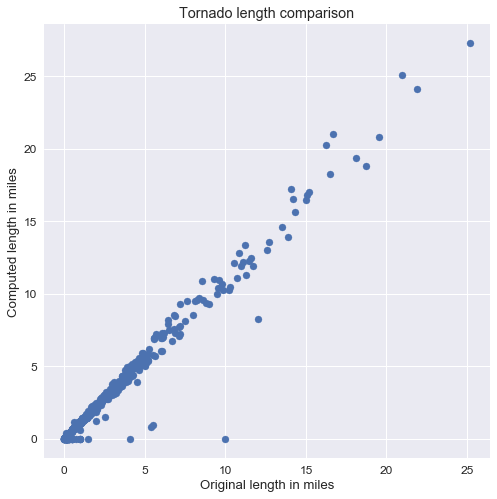

In [100]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)
plt.scatter(X2_t1.TOR_LENGTH, X2_t1.ComputedLength)
plt.title('Tornado length comparison')
plt.xlabel('Original length in miles')
plt.ylabel('Computed length in miles')
plt.show()

- There is a clear linear relation between the computed and original lengths.
- I was expecting them to be equal, but in general they are very close. 
- A few points are uncorrelated. It would be good to analyse why
- I tend to trust more the original length, as mine was computed from lat and long, which was computed by them from azimuth and range. It is an indirect computation. I will compute the length again later.

## Tornado's heading distribution

In [142]:
# Number of NaNs:
X2_t1.ComputedAzimuth.isnull().sum()

73

There are 73 NaNs, which are due to the fact that some beginning and end latitudes are the same $=>$ division by 0 in the Arctan formula.
<br> Let's analyse the general stats:

In [149]:
X2_t1[~X2_t1['ComputedAzimuth'].isnull()]['ComputedAzimuth'].describe()

count    427.000000
mean     101.385855
std      104.000160
min        0.000000
25%       40.485000
50%       61.460000
75%       83.270000
max      359.870000
Name: ComputedAzimuth, dtype: float64

The mean and the median are really different, let's seen a histogram

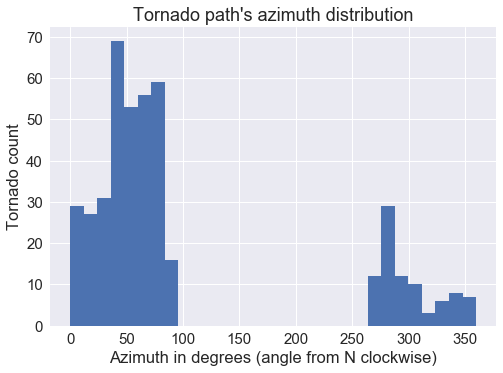

In [126]:
X2_t1[~X2_t1['ComputedAzimuth'].isnull()]['ComputedAzimuth'].hist(bins=30)
plt.title("Tornado path's azimuth distribution")
plt.xlabel("Azimuth in degrees (angle from N clockwise)")
plt.ylabel("Tornado count")
plt.show()

- Clearly there is a big gap of heading (towards Southern directions)
- The median represents the data better
- Let's replace the NaN values by the median then

In [127]:
X2_t1.ComputedAzimuth.fillna(61.46, inplace=True)
X2_t1.ComputedAzimuth.isnull().sum()

0

Let's use again the Python's tool Windrose to transform our azimuth data into an easily interpretable direction windrose

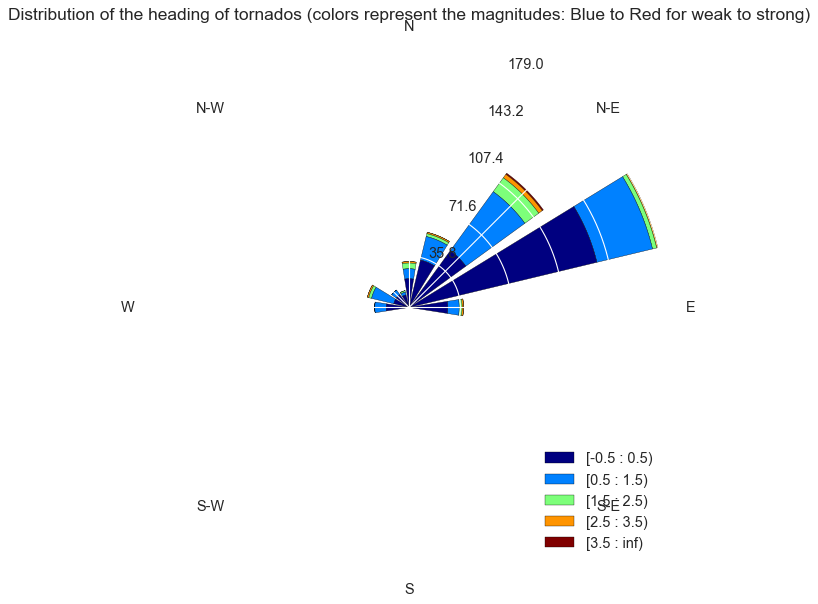

In [130]:
# DataFrame simulating speed as the tornado magnitude,
# and direction as the actual direction the tornado is heading
dfwindroseAzim = pd.DataFrame({'speed':list(X2_t1.TOR_F_SCALE.map(lambda x: 0 if x=='EF0' 
                                                                  else 1 if x=='EF1' 
                                                                  else 2 if x=='EF2' 
                                                                  else 3 if x=='EF3' 
                                                                  else 4).values),
                               'direction':list(X2_t1.ComputedAzimuth.values)}
                             ).reset_index(drop=True)

# Radial grids must be strictly positive for the windrose display:
dfwindroseAzim.direction = dfwindroseAzim.direction.map(lambda x: 0.001 if x==0 else x)

sns.set(font_scale=1.3)
plot_windrose(dfwindroseAzim, kind='bar', bins=np.arange(-0.5,4.5,1), edgecolor='black',
              label=['EF0','EF1','EF2','EF3','EF4'])

plt.title("Distribution of the heading of tornados (colors represent the magnitudes:\
          Blue to Red for weak to strong)")
plt.legend("lower right")
plt.show()

**This is an inexpected and interesting result: most tornadoes head North East! And none head South!**<br>
This is confirmed by the Storm Prediction Center (http://www.spc.noaa.gov/faq/tornado/):<br>
"Most move from southwest to northeast, or west to east."
<br>Another interesting fact on this subset is that the strongest EF3 and EF4 tornadoes head NE (and not ENE or NNE). It seems like a precise fact, which we should verify later with more data.

- Unfortunately, because I put 73 missing values equal to the median, the count of tornadoes heading ENE seems to be overestimated.
- Instead of working from the latitude and longitude data, which were actually computed by the SPC from a weather station of reference and values of range and azimuth, I am going to compute the tornado path's azimuth directly from those variables. It should be more accurate, and will allow using directly measured variables, instead of approximate values of lat and long.

## Direction and length of the tornado based on range and azimuth of beginning and end points:

- Given variables:
    - 0: weather station point
    - A: tornado starting point
    - B: tornado end point
    - $r_{A}$: range of A (=distance in miles from weather station to A)
    - $r_{A}$: range of B (=distance in miles from weather station to B)
    - $\alpha_{A}$: azimuth of A (=clockwise angle in degrees between North and $\overrightarrow{OA}$)
    - $\alpha_{B}$: azimuth of B (=clockwise angle in degrees between North and $\overrightarrow{OB}$)
<br>
<br>
- Unknown variables:
    - $\alpha$: azimuth of the tornado path (=clockwise angle in degrees between North and $\overrightarrow{AB}$)
    - $L$: tornado length in miles (=$AB$)


- From trigonometry, we get:
    * The tornado length:
$$ L = \sqrt{r_{A}^2+r_{B}^2-2r_{A}r_{B}\cos{(\alpha_{B}-\alpha_{A})}} $$
    * The tornado path azimuth:
$$ \alpha = \alpha_{B} + \arctan\left(\frac{r_{A}\sin{(\alpha_{B}-\alpha_{A})}}{r_{B}-r_{A}\cos{(\alpha_{B}-\alpha_{A})}}\right) $$

<br>
- We can now compare the values we had computed before using lat and long with those new ones. <br>Is the new computed length closer to original length? <br>Does the tornado azimuth still contain NaN values? <br>We will now try and answer those questions.

In [2]:
def compute_L_Az(df, rA='BEGIN_RANGE', alA='BEGIN_AZIMUTH', rB='END_RANGE', alB='END_AZIMUTH'):
    '''Takes a tornado dataframe in input, with range and direction azimuth from a reference
    point.
    Returns the dataframe with 2 new features: 
    direction the tornado headed (angle in degree clockwise from North)
    length of its straight path'''

    # Function writing underway!
    
    return df

# Next steps I intend to do

### Finish the work above
- better compute the azimuth from original tornado parameters
- check again the path length against original value

### Improve models:
- Redo modeling with new added features: tornado azimuth, mean latitude, mean longitude.
- Principal component analysis to check if our model gets a better score.

### Get more tornado data:
- Write a Class for the preprocessing work, in order to prepare for import of new data. I intend to use pipeline to make it more efficient<br>
- Import new data from the SCP website: one csv file for each year. Check how to do that in a go without having to download one by one.

### Incorporate other types of data:
- Incorporate "poverty" feature from US census:<br> https://www.census.gov/did/www/saipe/data/interactive/saipe.html?s_appName=saipe&map_yearSelector=2014&map_geoSelector=mhi_c&s_measures=aa_snc&menu=grid_proxy&s_inclUsTot=n&s_inclStTot=n&s_USStOnly=n
- Incorporate population per county info:<br> https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2016_PEPANNRES&src=pt
- Find weather data<br>

### NLP:
- NLP using the event and episode narratives. Extraction of significant words as features. 

### Final modeling
- Include the new features in our predictor list and check models' scores.<br>
- Try and predict other targets, like number of casualties or damage costs.<br>